In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
data = pd.read_excel("./Datasets/BBDD_Hospitalización.xlsx")
data.head()

c:\Users\Frank y Cami\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


valido el tipo de columnas que tengo

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

elimino columnas incesarias en este caso dias de hospitalizacion ya que el analisis es para determinar si son hospitalizados o no independientemente de los dias que duren, adicionalmente elimino numero de muestras tomadas ya que eso no determina si una persona debe ser hospitalizada

In [5]:
data = data.drop(["DIAS HOSPITALIZACION MQ","DIAS HOSPITALIZACIÓN UPC","NUMERO DE MUESTRAS TOMADAS","HOSPITALIZACIÓN ULTIMO MES","BIOPSIAS PREVIAS"],axis=1)

In [6]:
data.head()


,EDAD,DIABETES,PSA,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
0,53.0,NO,4.0,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI
1,56.0,NO,7.7,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI
2,57.0,NO,29.0,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI
3,56.0,NO,7.0,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI
4,55.0,NO,29.0,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI


In [7]:
data.describe()

,EDAD,PSA
count,568.000000,564.000000
mean,63.882042,13.271401
std,9.281517,15.668966
min,39.000000,0.600000
25%,59.000000,5.600000
50%,64.000000,8.000000
75%,69.000000,15.000000
max,151.000000,100.000000


se observan datos atipicos en la edad validando que al menos una esta en 151 años

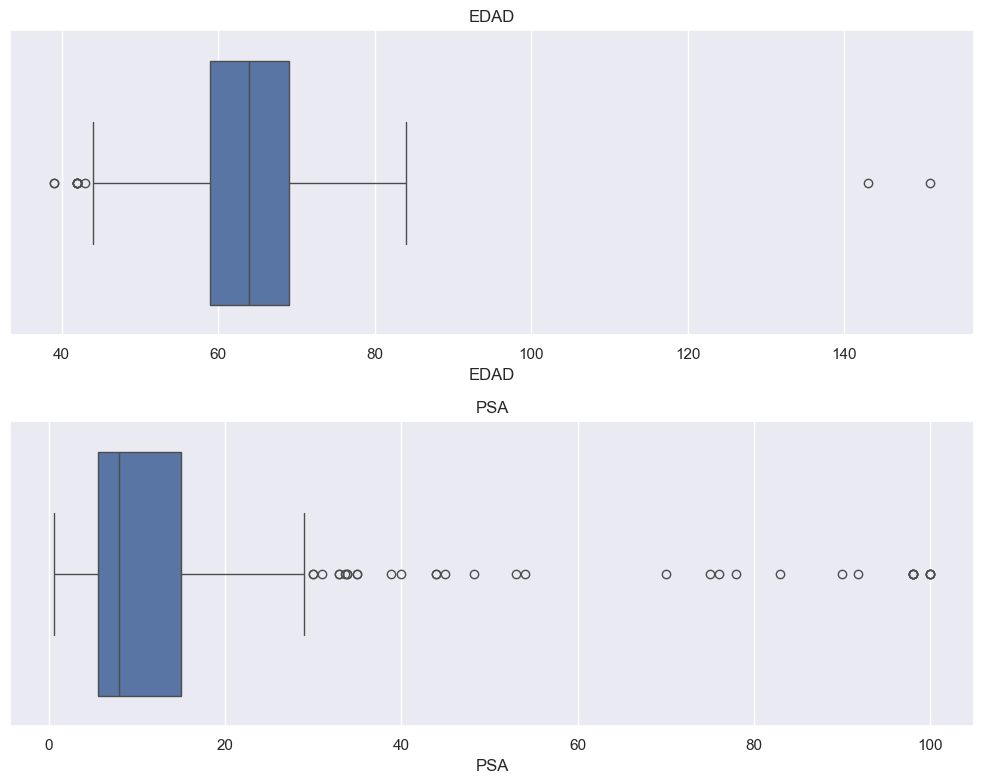

In [8]:
columnas_numericas = ["EDAD","PSA"]
fig,ax = plt.subplots(nrows=2,ncols=1,figsize= (10,8))

for i,col in enumerate(columnas_numericas):
    sns.boxplot(x= col,data = data,ax =ax[i])
    ax[i].set_title(col)
plt.tight_layout()
plt.show()

se eliminan datos mayores o igual a 100 anos, en cuanto al PSA, no han problema ya que es factible que exista la cantidad de 100

In [9]:
data = data[data["EDAD"] <= 100]

Volvemos a validar el boxplot

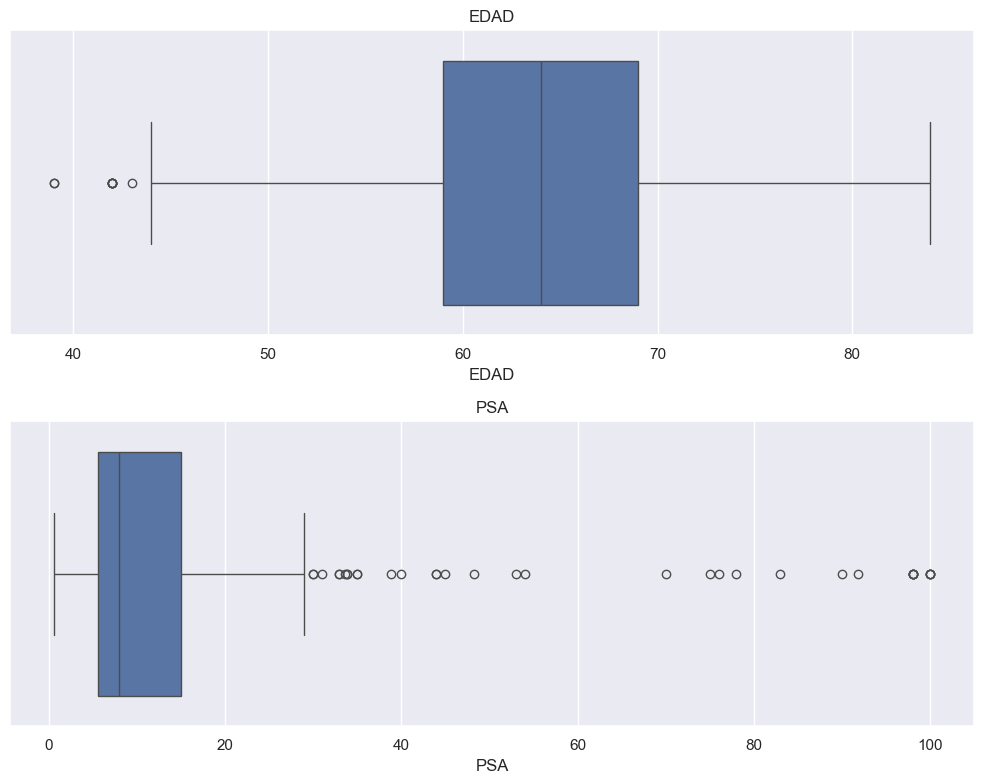

In [10]:
columnas_numericas = ["EDAD","PSA"]
fig,ax = plt.subplots(nrows=2,ncols=1,figsize= (10,8))

for i,col in enumerate(columnas_numericas):
    sns.boxplot(x= col,data = data,ax =ax[i])
    ax[i].set_title(col)
plt.tight_layout()
plt.show()

Se eliminan duplicados en caso de que existan

In [11]:
print("dataframe antes de drop dupliacate", data.shape)
data = data.drop_duplicates()
print("dataframe despues de drop dupliacate", data.shape)

dataframe antes de drop dupliacate (566, 15)
dataframe despues de drop dupliacate (456, 15)


Se procede a validar a traves de barplots los subniveles de cada columna


Columna: EDAD
EDAD
69.0    34
68.0    27
63.0    25
64.0    25
67.0    24
71.0    22
66.0    21
62.0    21
58.0    19
59.0    18
65.0    17
60.0    17
61.0    17
57.0    15
55.0    12
75.0    12
70.0    11
73.0    11
56.0    10
53.0    10
74.0     9
54.0     9
81.0     7
52.0     7
42.0     5
51.0     5
77.0     5
78.0     5
72.0     4
50.0     4
79.0     4
47.0     3
49.0     3
84.0     3
45.0     2
39.0     2
82.0     2
46.0     2
76.0     2
48.0     2
43.0     1
80.0     1
44.0     1
Name: count, dtype: int64


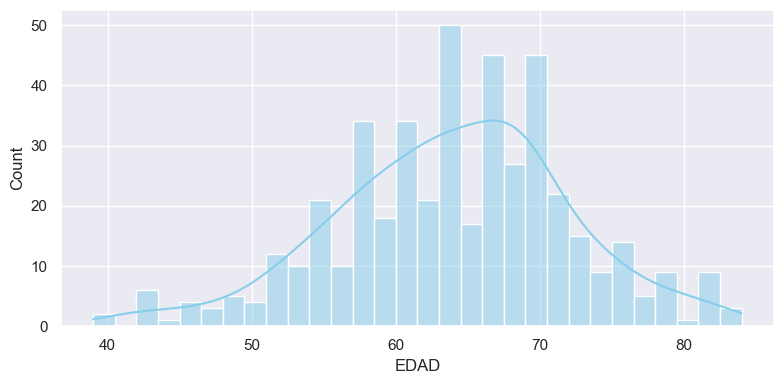


Columna: DIABETES
DIABETES
NO    405
SI     51
Name: count, dtype: int64


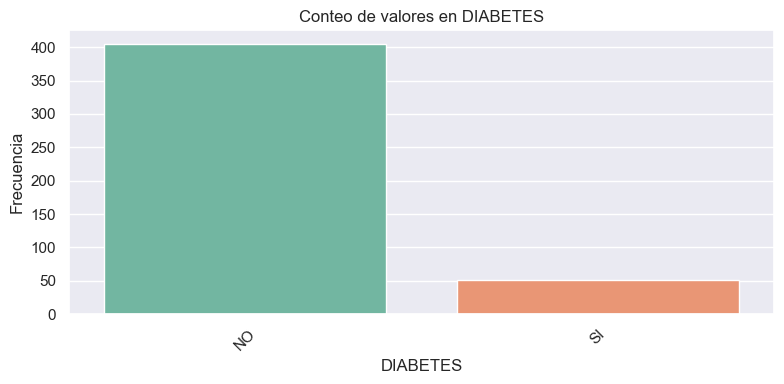


Columna: PSA
PSA
6.00     24
7.00     21
8.00     15
5.00     14
4.00     12
         ..
53.00     1
43.90     1
23.60     1
9.50      1
4.43      1
Name: count, Length: 147, dtype: int64


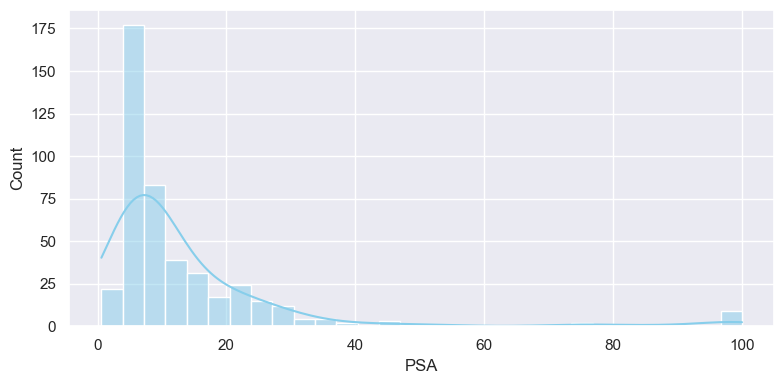


Columna: VOLUMEN PROSTATICO
VOLUMEN PROSTATICO
SI     323
NO     132
NaN      1
Name: count, dtype: int64


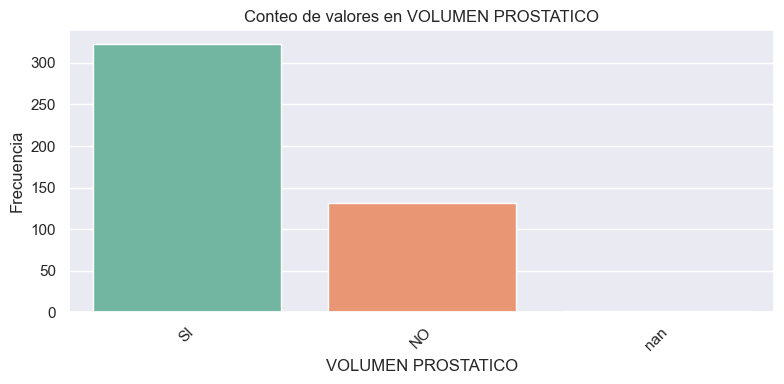


Columna: ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS
FLUOROQUINOLONA_AMINOGLICOSIDO    362
CEFALOSPORINA_AMINOGLUCOCIDO       45
OTROS                              33
OROQUINOLONAS                      12
FLUOROQUINOLONA_AMINOGLICÓSIDO      4
Name: count, dtype: int64


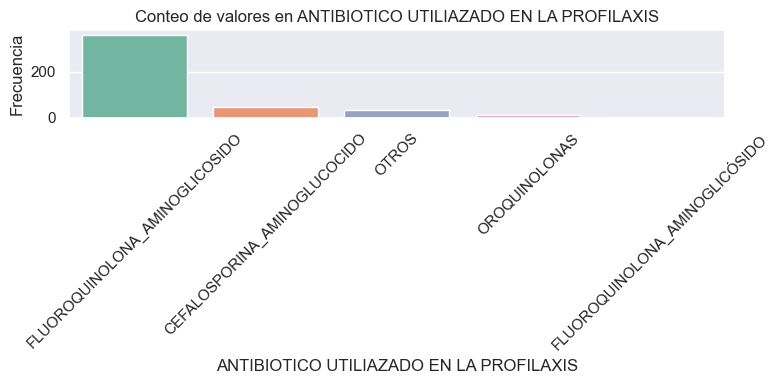


Columna: CUP
CUP
NO     452
SI       3
NaN      1
Name: count, dtype: int64


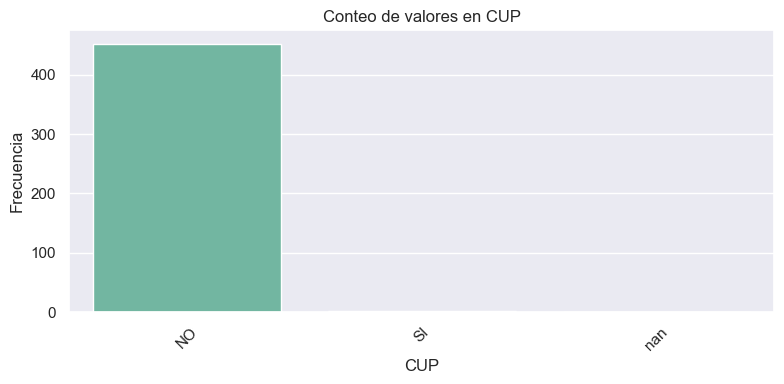


Columna: ENF. CRONICA PULMONAR OBSTRUCTIVA
ENF. CRONICA PULMONAR OBSTRUCTIVA
NO          438
SI            9
SI, EPOC      4
SI, ASMA      3
NaN           2
Name: count, dtype: int64


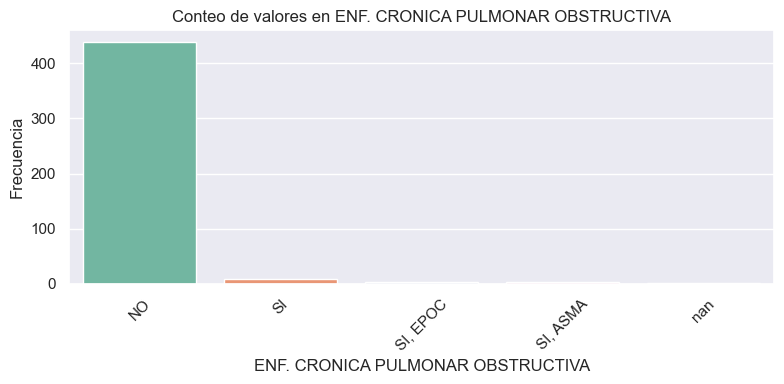


Columna: BIOPSIA
BIOPSIA
NEG                                           227
ADENOCARCINOMA GLEASON 7                       99
ADENOCARCINOMA GLEASON 6                       37
ADENOCARCINOMA GLEASON 9                       20
ADENOCARCINOMA GLEASON 8                       20
ADENOCARCINOMA GLEASON 6                       16
HIPERPLASIA PROSTATICA                         13
PROSTATITIS                                     9
ADENOCARCINOMA GLEASON 7                        9
ADENOCARCINOMA GLEASON 10                       4
CARCINOMA INDIFERENCIADO DE CELULAS CLARAS      2
Name: count, dtype: int64


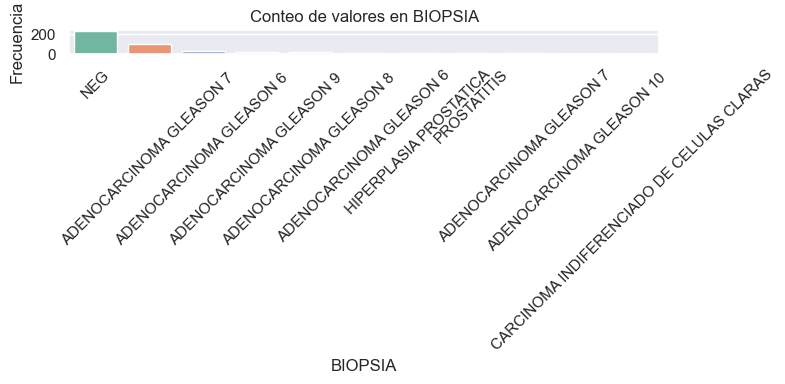


Columna: NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA
NO    430
2       9
3       8
1       5
5       2
9       2
Name: count, dtype: int64


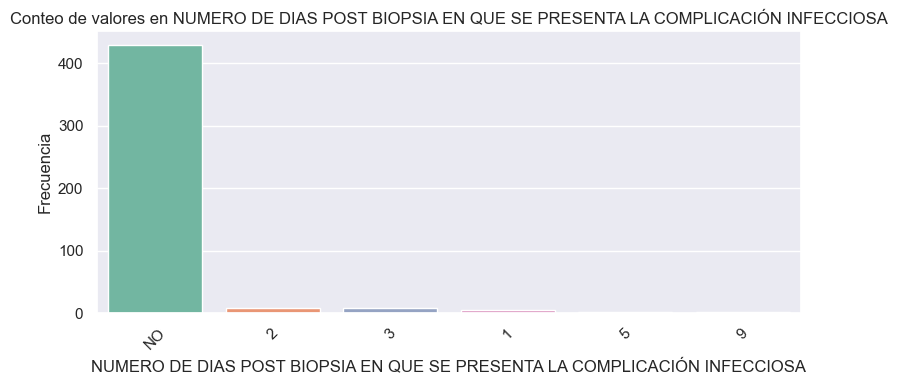


Columna: FIEBRE
FIEBRE
NO    419
SI     37
Name: count, dtype: int64


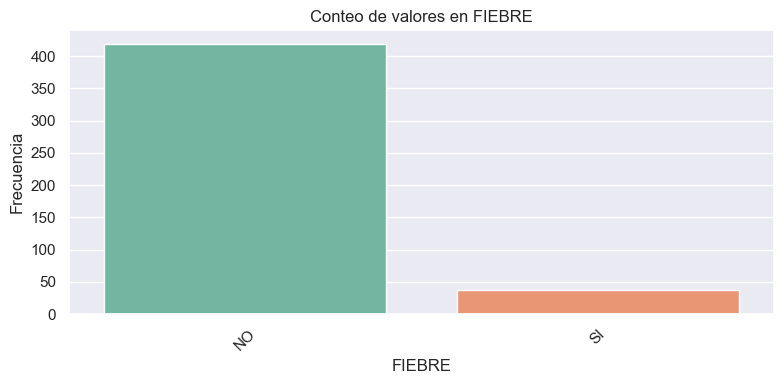


Columna: ITU
ITU
NO    450
SI      6
Name: count, dtype: int64


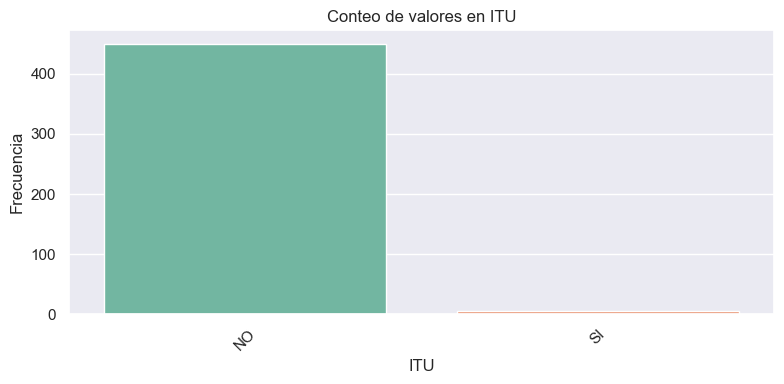


Columna: TIPO DE CULTIVO
TIPO DE CULTIVO
NO                          448
UROCULTIVO                    4
HEMOCULTIVO                   2
HEMOCULTIVO Y UROCULTIVO      2
Name: count, dtype: int64


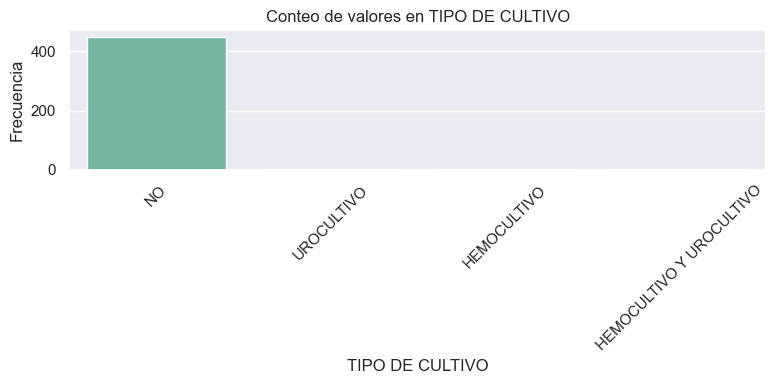


Columna: AGENTE AISLADO
AGENTE AISLADO
NO                        431
NaN                        17
E.COLI                      6
PSEUDOMONAS AERUGINOSA      2
Name: count, dtype: int64


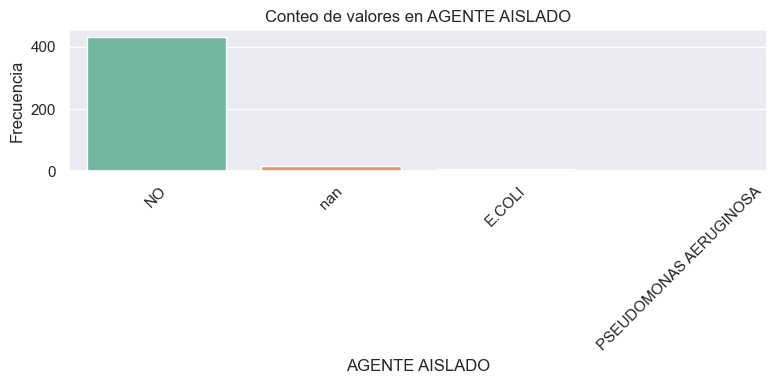


Columna: PATRON DE RESISTENCIA
PATRON DE RESISTENCIA
NO                                                                                 449
RESISTENTE A AMPI, CIPRO Y GENTA                                                     2
RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA      2
MULTI SENSIBLE                                                                       2
 AMPI R, CIPRO R, GENTA R, SULFA M R                                                 1
Name: count, dtype: int64


C:\Users\Frank y Cami\AppData\Local\Temp\ipykernel_4440\4063329349.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


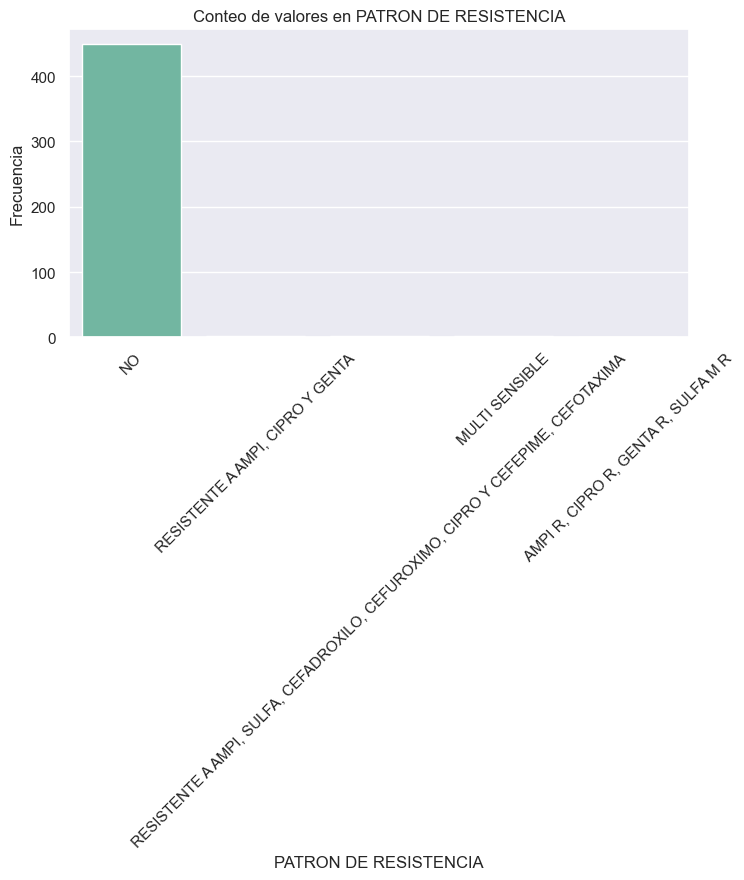


Columna: HOSPITALIZACION
HOSPITALIZACION
NO     429
SI      24
NaN      3
Name: count, dtype: int64


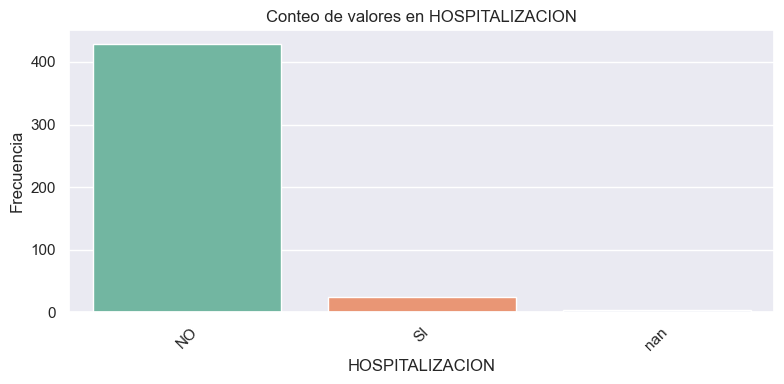

In [12]:
for col in data.columns:
    print(f"\nColumna: {col}")
    print(data[col].value_counts(dropna=False))

    conteo = data[col].value_counts(dropna=False)

    plt.figure(figsize=(8,4))

    if data[col].dtype == "object" or len(conteo) <=20:
        sns.barplot(x=conteo.index.astype(str),y=conteo.values,hue=conteo.index.astype(str),palette="Set2",legend=False)
        plt.xticks(rotation=45)
        plt.title(f'Conteo de valores en {col}')
        plt.ylabel("Frecuencia")
        plt.xlabel(col)

    else:
        sns.histplot(data[col].dropna(),bins=30,kde=True,color="skyblue")
    
    plt.tight_layout()
    plt.show()
        

En primera instancia voy a eliminar los nulos de la fila Hospitalizacion, definitivamente no deberia estar en la variable de salida, de resto no se observan subniveles mal escritos o repetidos

In [13]:
data = data.dropna(subset= ["HOSPITALIZACION"])


Columna: EDAD
EDAD
69.0    34
68.0    27
64.0    25
63.0    24
67.0    24
71.0    22
66.0    21
62.0    21
58.0    19
59.0    18
65.0    17
60.0    17
61.0    16
57.0    15
55.0    12
75.0    12
70.0    11
73.0    11
56.0    10
53.0    10
54.0     9
74.0     8
81.0     7
52.0     7
42.0     5
51.0     5
77.0     5
78.0     5
72.0     4
50.0     4
79.0     4
47.0     3
49.0     3
84.0     3
45.0     2
39.0     2
82.0     2
46.0     2
76.0     2
48.0     2
43.0     1
80.0     1
44.0     1
Name: count, dtype: int64


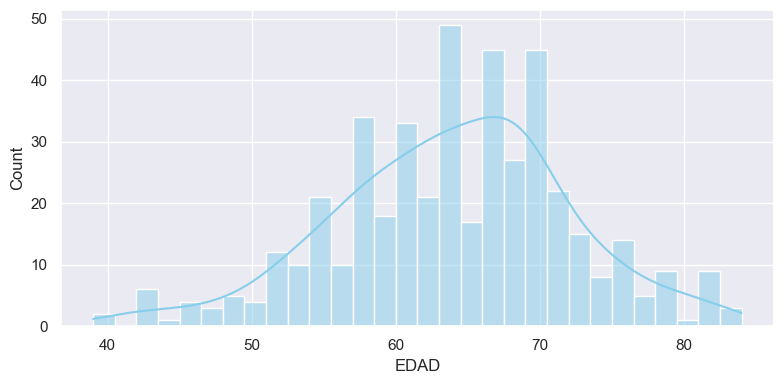


Columna: DIABETES
DIABETES
NO    402
SI     51
Name: count, dtype: int64


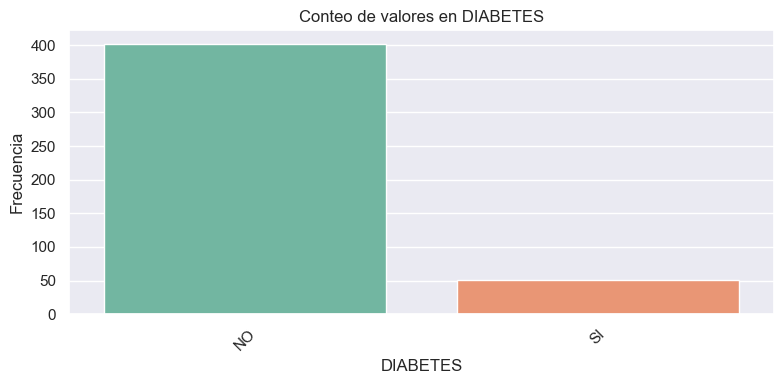


Columna: PSA
PSA
6.00     24
7.00     20
8.00     15
5.00     14
4.00     12
         ..
9.50      1
40.00     1
4.10      1
38.90     1
4.43      1
Name: count, Length: 147, dtype: int64


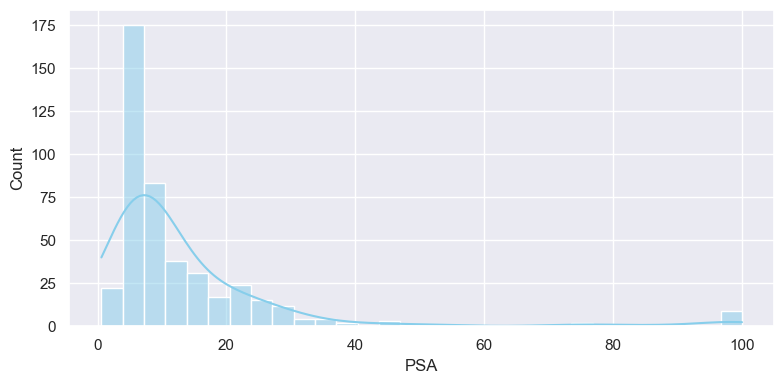


Columna: VOLUMEN PROSTATICO
VOLUMEN PROSTATICO
SI     323
NO     129
NaN      1
Name: count, dtype: int64


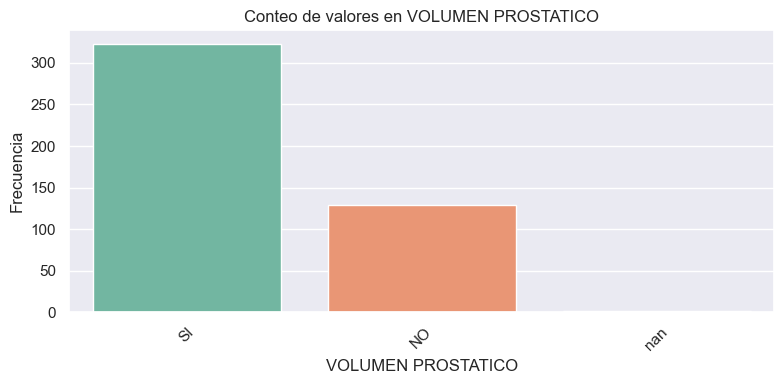


Columna: ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS
FLUOROQUINOLONA_AMINOGLICOSIDO    360
CEFALOSPORINA_AMINOGLUCOCIDO       45
OTROS                              33
OROQUINOLONAS                      12
FLUOROQUINOLONA_AMINOGLICÓSIDO      3
Name: count, dtype: int64


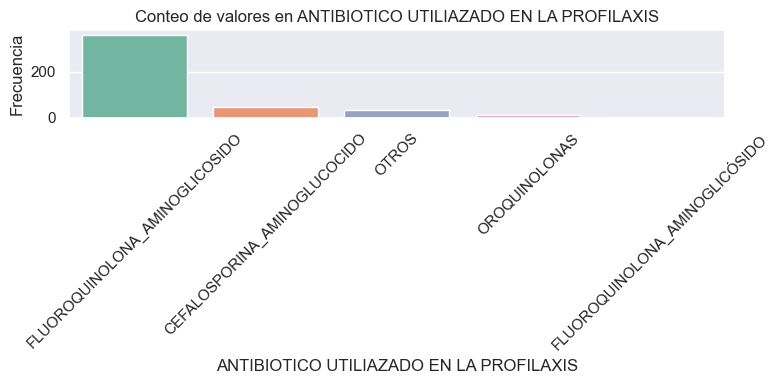


Columna: CUP
CUP
NO     449
SI       3
NaN      1
Name: count, dtype: int64


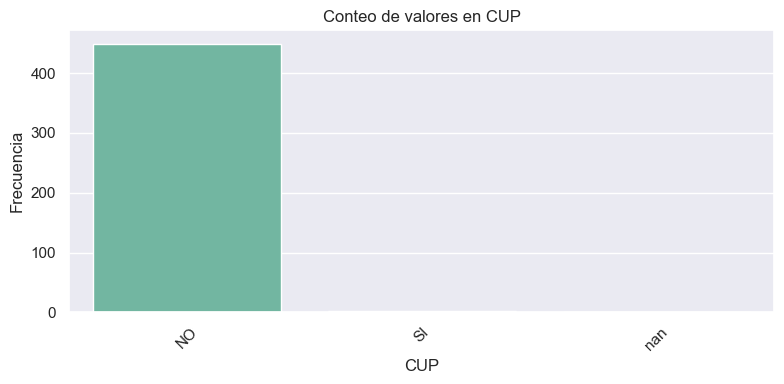


Columna: ENF. CRONICA PULMONAR OBSTRUCTIVA
ENF. CRONICA PULMONAR OBSTRUCTIVA
NO          436
SI            9
SI, EPOC      4
SI, ASMA      2
NaN           2
Name: count, dtype: int64


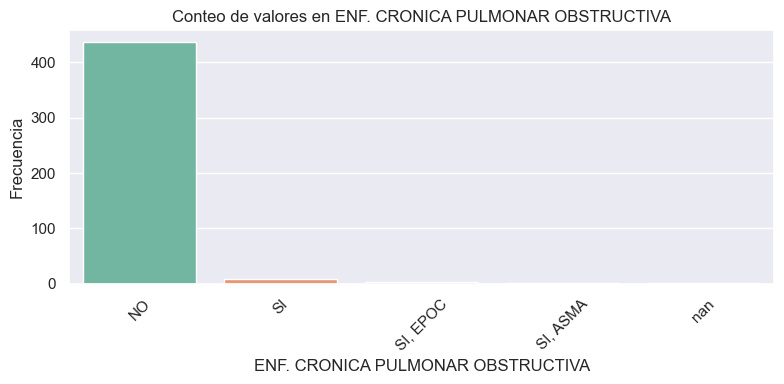


Columna: BIOPSIA
BIOPSIA
NEG                                           226
ADENOCARCINOMA GLEASON 7                       97
ADENOCARCINOMA GLEASON 6                       37
ADENOCARCINOMA GLEASON 9                       20
ADENOCARCINOMA GLEASON 8                       20
ADENOCARCINOMA GLEASON 6                       16
HIPERPLASIA PROSTATICA                         13
PROSTATITIS                                     9
ADENOCARCINOMA GLEASON 7                        9
ADENOCARCINOMA GLEASON 10                       4
CARCINOMA INDIFERENCIADO DE CELULAS CLARAS      2
Name: count, dtype: int64


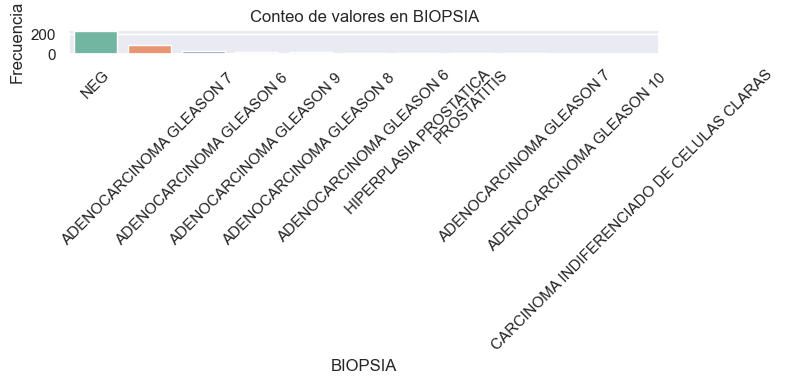


Columna: NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA
NO    427
2       9
3       8
1       5
5       2
9       2
Name: count, dtype: int64


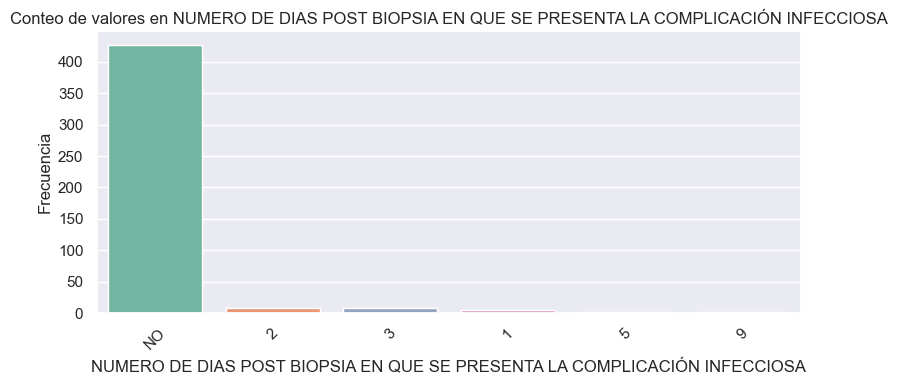


Columna: FIEBRE
FIEBRE
NO    416
SI     37
Name: count, dtype: int64


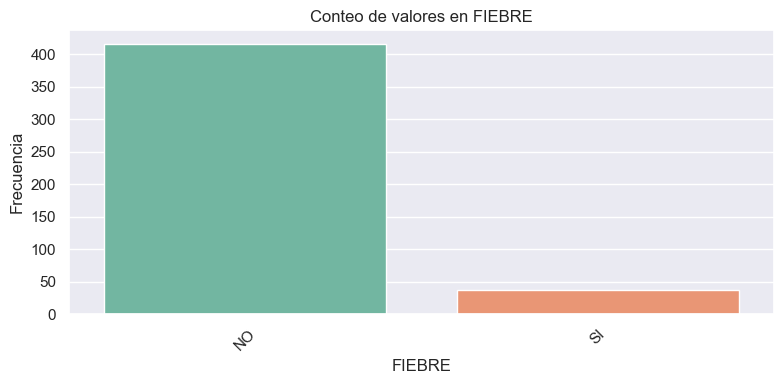


Columna: ITU
ITU
NO    447
SI      6
Name: count, dtype: int64


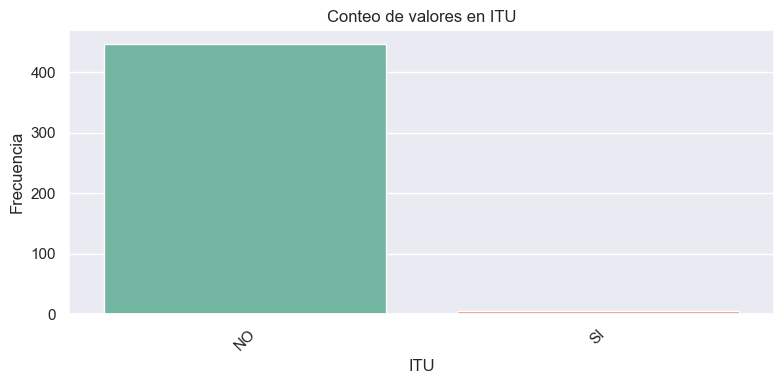


Columna: TIPO DE CULTIVO
TIPO DE CULTIVO
NO                          445
UROCULTIVO                    4
HEMOCULTIVO                   2
HEMOCULTIVO Y UROCULTIVO      2
Name: count, dtype: int64


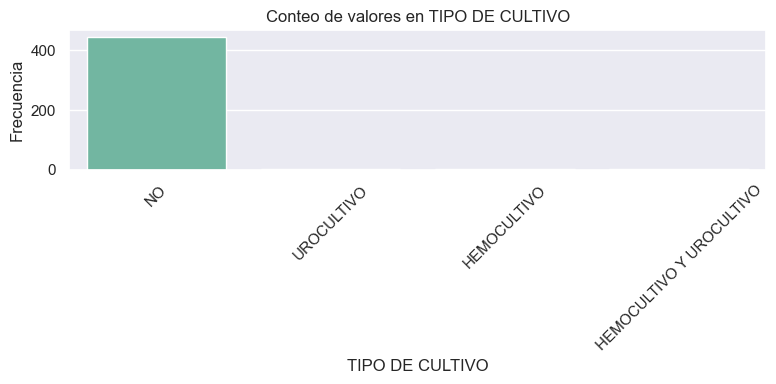


Columna: AGENTE AISLADO
AGENTE AISLADO
NO                        428
NaN                        17
E.COLI                      6
PSEUDOMONAS AERUGINOSA      2
Name: count, dtype: int64


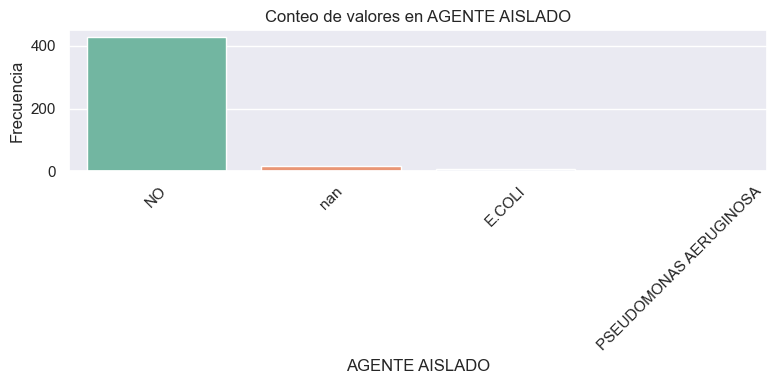


Columna: PATRON DE RESISTENCIA
PATRON DE RESISTENCIA
NO                                                                                 446
RESISTENTE A AMPI, CIPRO Y GENTA                                                     2
RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA      2
MULTI SENSIBLE                                                                       2
 AMPI R, CIPRO R, GENTA R, SULFA M R                                                 1
Name: count, dtype: int64


C:\Users\Frank y Cami\AppData\Local\Temp\ipykernel_4440\2066187535.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


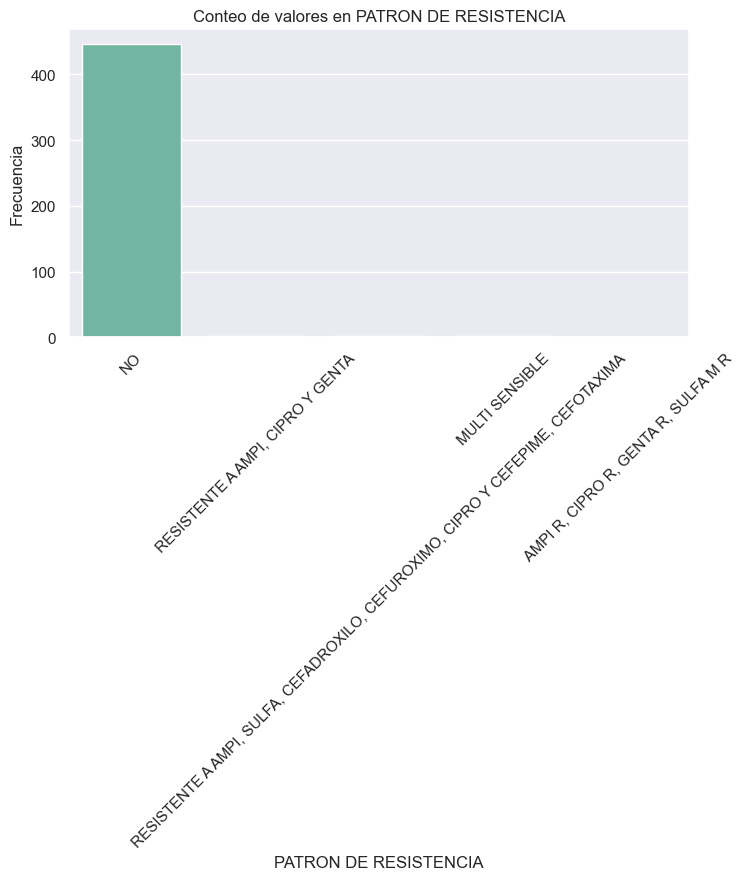


Columna: HOSPITALIZACION
HOSPITALIZACION
NO    429
SI     24
Name: count, dtype: int64


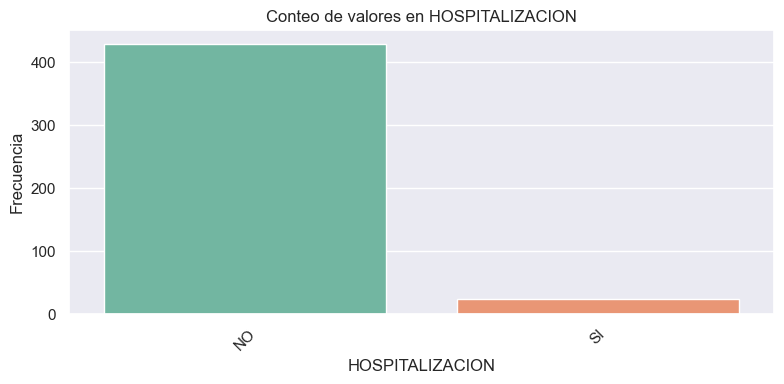

In [14]:
for col in data.columns:
    print(f"\nColumna: {col}")
    print(data[col].value_counts(dropna=False))

    conteo = data[col].value_counts(dropna=False)

    plt.figure(figsize=(8,4))

    if data[col].dtype == "object" or len(conteo) <=20:
        sns.barplot(x=conteo.index.astype(str),y=conteo.values,hue=conteo.index.astype(str),palette="Set2",legend=False)
        plt.xticks(rotation=45)
        plt.title(f'Conteo de valores en {col}')
        plt.ylabel("Frecuencia")
        plt.xlabel(col)

    else:
        sns.histplot(data[col].dropna(),bins=30,kde=True,color="skyblue")
    
    plt.tight_layout()
    plt.show()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 453 entries, 0 to 567
Data columns (total 15 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       453 non-null    float64
 1   DIABETES                                                                   453 non-null    object 
 2   PSA                                                                        449 non-null    float64
 3   VOLUMEN PROSTATICO                                                         452 non-null    object 
 4   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                    453 non-null    object 
 5   CUP                                                                        452 non-null    object 
 6   ENF. CRONICA PULMONAR OBSTRUCTIVA                              

In [16]:
from sklearn.preprocessing import LabelEncoder

Se cambian las etiquetas categoricas a numerales con Labelencoding

In [17]:
label_encoders = {}
for col in data.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 453 entries, 0 to 567
Data columns (total 15 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       453 non-null    float64
 1   DIABETES                                                                   453 non-null    int32  
 2   PSA                                                                        449 non-null    float64
 3   VOLUMEN PROSTATICO                                                         453 non-null    int32  
 4   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                    453 non-null    int32  
 5   CUP                                                                        453 non-null    int32  
 6   ENF. CRONICA PULMONAR OBSTRUCTIVA                              

no voy a usar aun normalizacion de escalas numericas ya que todas las columnas mantienen una escala en comun

voy a usar una matriz de correlacion

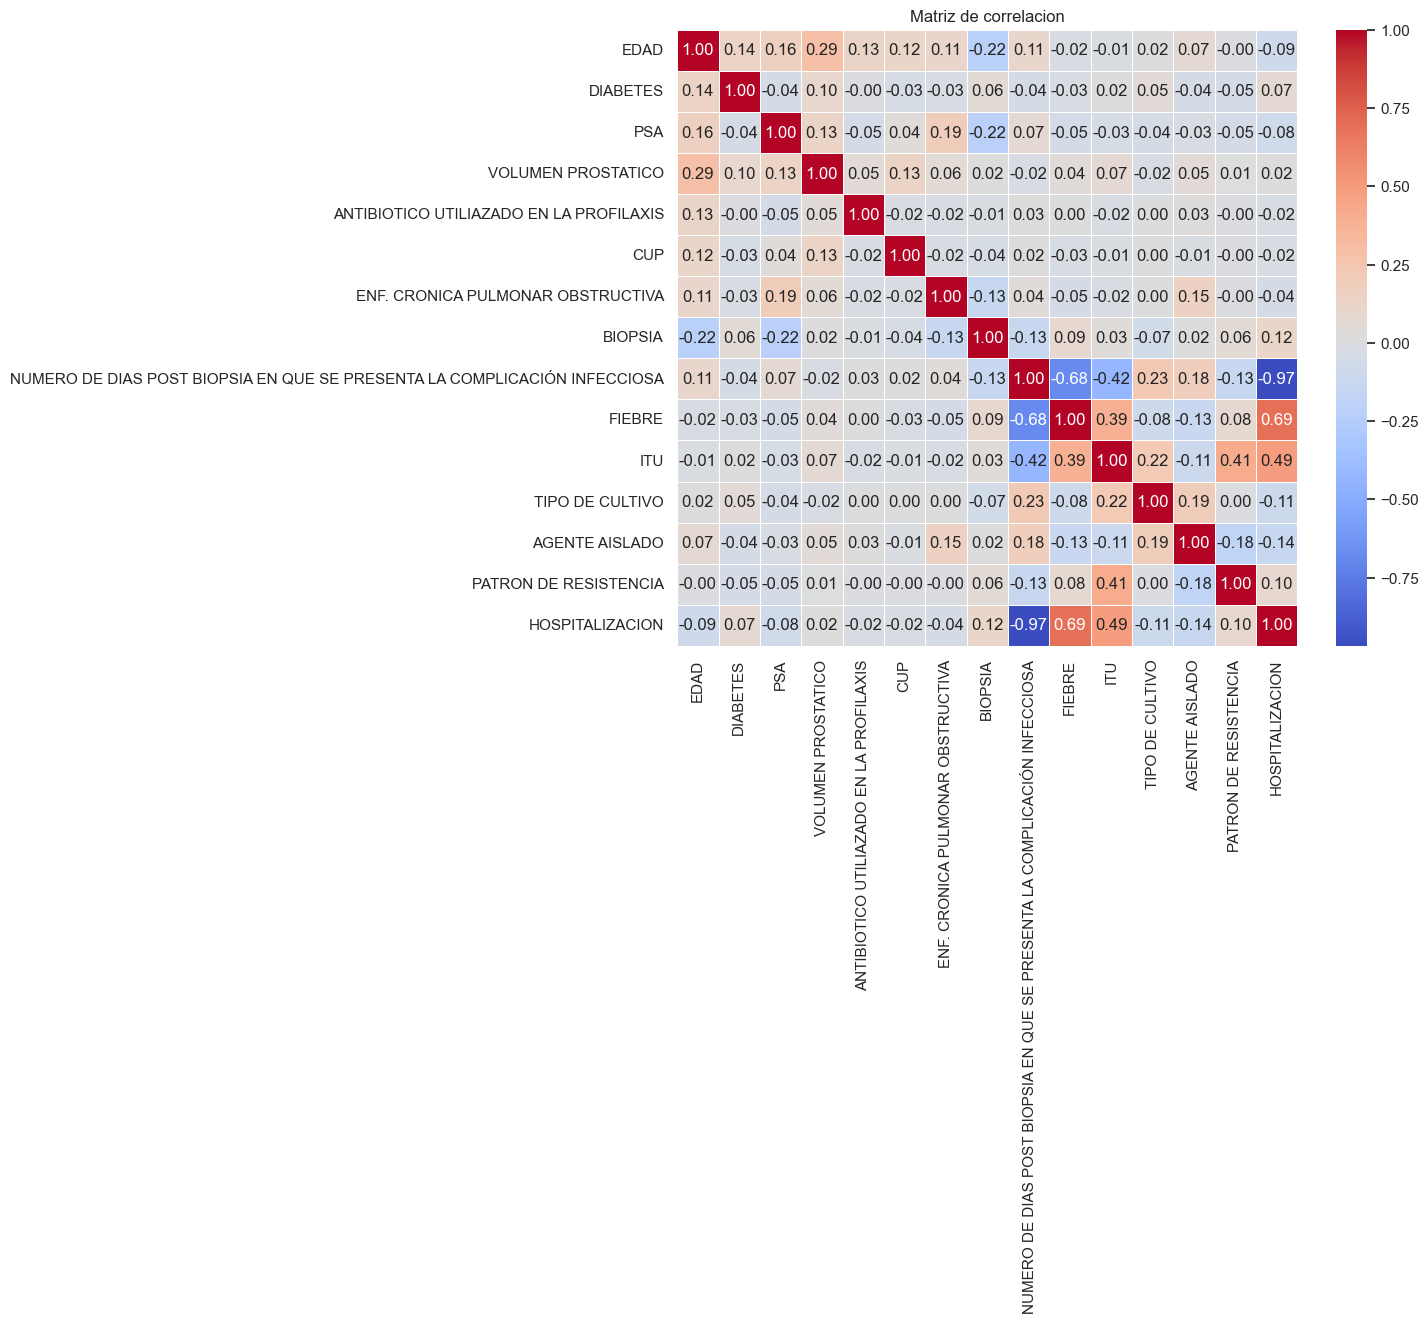

In [19]:
correlacion = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlacion,annot=True,cmap="coolwarm",fmt= ".2f",linewidths=0.5)
plt.title("Matriz de correlacion")
plt.show()

aqui puedo validar lo siguiente numero de dias de post biopsia presenta una alta correlacion negativa, a mayor cantidad de dias menor probabilidad de hospitalizacion, ITU y firbre presentan alta correlacion positiva a mayor cantidad mayor probabilidad de hospitalizacion

voy a guradar esta base de datos limpia cpomo un archivo excel

In [20]:
data.to_excel("data_limpia.xlsx",index=False)

MODELADO

In [21]:
data2 = pd.read_excel("data_limpia.xlsx")
data2.head()

,EDAD,DIABETES,PSA,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
0,53,0,4.0,1,1,0,0,9,0,1,0,2,1,2,1
1,56,0,7.7,1,1,0,0,9,0,1,0,2,1,2,1
2,57,0,29.0,1,1,0,0,9,0,1,0,0,0,0,1
3,56,0,7.0,1,1,0,0,9,0,1,0,2,1,2,1
4,55,0,29.0,1,1,0,0,9,0,1,0,0,0,2,1


In [22]:
X = data2[["NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA", "FIEBRE","ITU"]]
y= data2["HOSPITALIZACION"]

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(317, 3) (136, 3) (317,) (136,)


In [25]:
arbol = DecisionTreeClassifier(max_depth=5,class_weight="balanced" ,random_state=42)

In [26]:
arbol.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [27]:
y_pred = arbol.predict(X_test)

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00        13

    accuracy                           1.00       136
   macro avg       1.00      1.00      1.00       136
weighted avg       1.00      1.00      1.00       136



In [29]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[123   0]
 [  0  13]]


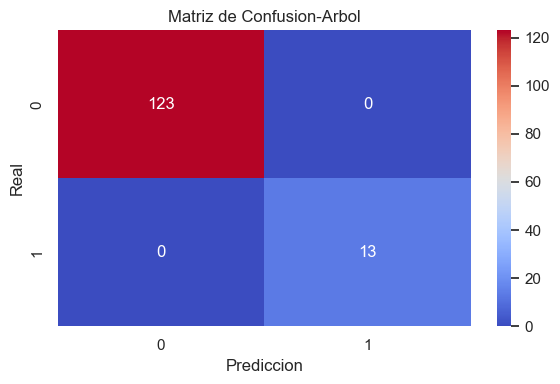

In [30]:
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap="coolwarm")
plt.xlabel("Prediccion")
plt.ylabel("Real")
plt.title("Matriz de Confusion-Arbol")
plt.tight_layout()
plt.show()

USAR EL MODELO CON KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier

En este punto se procede a usar nuevamente las variables     

In [32]:
X2 = X
y2 = y

Se normalizan las variables ya que KNN es sencible a las escalas, para ello voy a utilizar Standard Scaler

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
sc = StandardScaler()
X2 = sc.fit_transform(X2)

Se divide el dataset en subsets de training y testing

In [35]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.3,random_state=42)
print(X2_train.shape,X2_test.shape,y2_train.shape,y2_test.shape)

(317, 3) (136, 3) (317,) (136,)


instanciamos el modelo de KNN y entrenamos

In [39]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X2_train,y2_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


ahora predecimos

In [40]:
y2_pred= knn.predict(X2_test)

Y ahora se evalua el modelo

In [41]:
print(classification_report(y2_test,y2_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       124
           1       1.00      1.00      1.00        12

    accuracy                           1.00       136
   macro avg       1.00      1.00      1.00       136
weighted avg       1.00      1.00      1.00       136



VISUALIZAMOS LAS ETIQUETAS EN LA MATRIZ DE CONFUSION

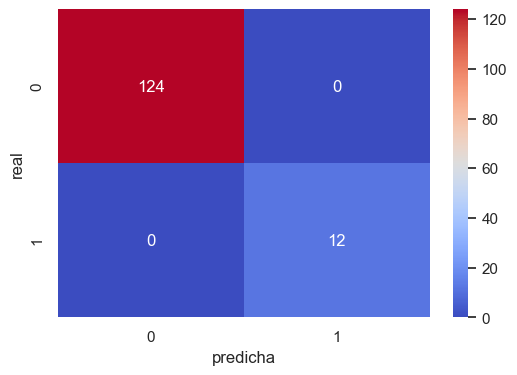

In [56]:
cm2 = confusion_matrix(y2_test,y2_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm2,annot=True,fmt="d",cmap="coolwarm")
plt.xlabel("predicha")
plt.ylabel("real")
plt.show()